In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
# gaussian 
x = [[8, 3, 2], [2, 7, 3], [-3, 2, 12]]
y = [121, 82, 34]

def diagonaldominan(matrix):
    matrix = np.array(matrix)
    abs_mat = np.abs(matrix)
    diag = np.array(np.diag(abs_mat))
    np.fill_diagonal(abs_mat, 0)
    off_diag = np.sum(abs_mat, axis=1)
    return np.all(diag >= off_diag)

def gauss(x, y, epsilon = 0.001):
    if not diagonaldominan(x):
        print("bukan diagonal dominan")
        return
    
    x = np.array(x)
    y = np.array(y)
    
    diag = np.diag(np.array(x))
    np.fill_diagonal(x, 0)
    
    res = np.zeros(diag.shape)
    
    maxiter = 100
    for i in range(maxiter):
        new_res = np.array(res)
        for j, row in enumerate(x):
            new_res[j] =  (y[j] - np.dot(row, new_res))/diag[j]
        print(f'iteration {i}: {new_res}')
        
        diff = np.sqrt(np.dot(new_res - res, new_res - res))
        if diff <= epsilon:
            print('converged: ', res)
            return
        res = new_res
        
gauss(x, y)

iteration 0: [15.125       7.39285714  5.38244048]
iteration 1: [11.00706845  6.26264881  4.54132564]
iteration 2: [11.64117529  6.44195321  4.66996829]
iteration 3: [11.54177547  6.4152206   4.64957377]
iteration 4: [11.55689883  6.41964015  4.65261802]
iteration 5: [11.55448044  6.41902644  4.6521157 ]
iteration 6: [11.55483616  6.41914008  4.65218569]
converged:  [11.55448044  6.41902644  4.6521157 ]


[ 1.05554143 67.90746161]


<function matplotlib.pyplot.show(close=None, block=None)>

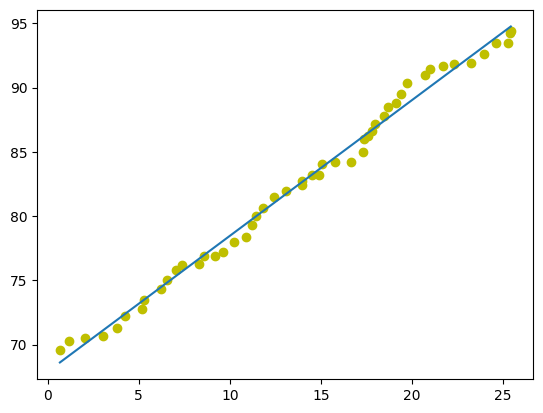

In [12]:
# leastsquare
# masih bentuk 
x = [
0.667257363,
1.163272104,
2.059775843,
3.026043396,
3.823459252,
4.237522149,
5.175051771,
5.274506600,
6.244287409,
6.542814643,
7.055059567,
7.390116752,
8.288971198,
8.579231789,
9.210386935,
9.620823117,
10.25700941,
10.89194207,
11.21369076,
11.41558731,
11.84950537,
12.41654640,
13.07341967,
13.93756043,
13.96383483,
14.49473702,
14.90972704,
15.07248603,
15.79685930,
16.65678362,
17.30883901,
17.35006975,
17.58938929,
17.79778379,
18.00169342,
18.48060630,
18.71248139,
19.11376774,
19.39409803,
19.74650750,
20.74546216,
21.01455518,
21.69457689,
22.33519718,
23.26208851,
23.97298783,
24.60252331,
25.28542718,
25.36556687,
25.43342769,
]
y = [
69.61612841,
70.31009462,
70.52967130,
70.69226554,
71.26272117,
72.19410464,
72.75925445,
73.48095621,
74.32835598,
75.00604086,
75.81053537,
76.18342777,
76.26701376,
76.88125364,
76.88850065,
77.20628611,
77.99029850,
78.41087441,
79.33575636,
79.98614235,
80.62260103,
81.46225811,
81.97599388,
82.40526228,
82.75687635,
83.19695143,
83.22854080,
84.05539698,
84.18519963,
84.20141506,
84.96388936,
85.96117288,
86.20746789,
86.59131925,
87.14506062,
87.80712240,
88.51922370,
88.82890416,
89.52846481,
90.37898232,
90.98286205,
91.47855750,
91.71240983,
91.87073017,
91.94818226,
92.59044238,
93.44106750,
93.50315021,
94.20888309,
94.39807859,
]

# ini tuh rumus linear regresi yang sudah di sederhana
# B(beta) ini menyimpan dua nilai yaitu beta0 dan beta 1
# karena beta ini bisa dianggap y = mx(beta0) + c(beta1)
# HAFAL RUMUS

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
y = y[: np.newaxis]

a1 = np.dot(A.T, A)
a2 = np.linalg.inv(a1)
a3 = np.dot(a2, A.T)
a4 = np.dot(a3, y)

print(a4)

plt.plot(x, y, 'oy', label = "coordinate")
plt.plot(x, a4[0]*x + a4[1], label = "regresi linear")
plt.legend
plt.show

In [16]:
# find root
# 3x^3 + 7x^2 + 3x - 1
# 9x^2 + 14 x + 3

def f(x):
    return 3*x**3 + 7*x**2 + 3*x - 1
def g(x):
    return 9*x**2 + 14*x + 3

def newton_rhamson(x0, iter, error = 0.01, maxiter = 100):
    if iter >= maxiter:
        print('max iteration has been reached')
        return
    
    x1 = x0 - f(x0)/g(x0)
    print(f'iteration {iter}: {x1}')
    if(np.abs(f(x1)) <= error):
        print(f'root is found at {x1}')
        return
    newton_rhamson(x1, iter+1)
    
newton_rhamson(1,0)

iteration 0: 0.5384615384615384
iteration 1: 0.3016686284013016
iteration 2: 0.22403098155866766
iteration 3: 0.21535564206563615
root is found at 0.21535564206563615


In [23]:
# reimman
# return 2x^2 - 7x - 8

def f(x):
    return 2*x**2 - 7*x - 8

n = 100
left = 3
right = 4

pointx = np.linspace(left, right, n)

width = pointx[1] - pointx[0]

leftarea = width * np.sum(f(pointx[0 : n-1]))
print(leftarea)

rightarea = width * np.sum(f(pointx[1 : n]))
print(rightarea)

mid = (pointx[0 : n-1] + pointx[1 : n])/2
midarea = width * np.sum(f(mid))
print(midarea)

# trapezoid
trap = f(pointx[0]) + f(pointx[n-1]) + np.sum(2*f(pointx[1 : n-1]))
tr = width/2 * trap
print(tr)


-7.868652858551727
-7.797945787844656
-7.83335033840072
-7.83329932319819
